# Binomial Logistic Regression Cancer

### Since it is cancer prediction, we are looking for 
1. Very low log loss
2. Hign Recall and 
3. High Precision
4. 3 & 4 Means hign F1-score

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
cancerDF = pd.read_csv('cancer_data.csv')

In [3]:
cancerDF.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancerDF.shape

(569, 33)

In [5]:
cancerDF.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
cancerDF = cancerDF.drop(['id', 'Unnamed: 32'], axis=1)

In [7]:
cancerDF.shape

(569, 31)

In [8]:
cancerDF.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
cancerDF.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [10]:
cancerDF['diagnosis_outcome'] = cancerDF['diagnosis'].apply(lambda x: 1 if 'M' == x else 0)

In [11]:
cancerDF.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_outcome
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [12]:
cancerDF.drop(['diagnosis'], axis=1, inplace=True)

In [13]:
cancerDF.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [14]:
cancerDF.describe(include='all')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_outcome
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
corr = cancerDF.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_outcome
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


In [16]:
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [17]:
X = cancerDF[['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
            'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
            'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
            'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
y = cancerDF['diagnosis_outcome']

In [18]:
y.value_counts()

0    357
1    212
Name: diagnosis_outcome, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [20]:
y_train.value_counts()

0    287
1    168
Name: diagnosis_outcome, dtype: int64

In [21]:
y_test.value_counts()

0    70
1    44
Name: diagnosis_outcome, dtype: int64

In [22]:
model = LogisticRegression(solver='liblinear')
all_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)

In [23]:
all_accuracies

array([0.94565217, 0.97826087, 0.96703297, 0.93333333, 0.94444444])

In [24]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred_prob = model.predict_proba(X_test)

In [26]:
pred = model.predict(X_test)

In [27]:
pred_prob

array([[1.56674105e-03, 9.98433259e-01],
       [5.83503986e-02, 9.41649601e-01],
       [9.95937753e-01, 4.06224744e-03],
       [2.66103142e-01, 7.33896858e-01],
       [9.97731792e-01, 2.26820846e-03],
       [0.00000000e+00, 1.00000000e+00],
       [9.90755463e-01, 9.24453655e-03],
       [9.99769546e-01, 2.30453997e-04],
       [9.99558200e-01, 4.41800237e-04],
       [9.98507173e-01, 1.49282662e-03],
       [9.85305399e-01, 1.46946011e-02],
       [5.29762900e-11, 1.00000000e+00],
       [9.99473085e-01, 5.26915337e-04],
       [2.20609305e-04, 9.99779391e-01],
       [1.33226763e-15, 1.00000000e+00],
       [9.27944969e-01, 7.20550313e-02],
       [5.41757935e-04, 9.99458242e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.99075769e-01, 9.24231014e-04],
       [9.99987740e-01, 1.22597278e-05],
       [9.71306113e-01, 2.86938871e-02],
       [9.99058209e-01, 9.41791301e-04],
       [8.37914182e-11, 1.00000000e+00],
       [3.48426038e-01, 6.51573962e-01],
       [9.428159

In [28]:
pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [29]:
type(pred_prob)

numpy.ndarray

In [30]:
y_pred = (pred_prob[:,1]>=0.3) * 1

In [31]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1])

In [32]:
from sklearn import metrics

metrics.roc_auc_score(y_test, y_pred)

0.9188311688311689

In [33]:
cnf_metrics = metrics.confusion_matrix(y_test, y_pred)
cnf_metrics

array([[65,  5],
       [ 4, 40]], dtype=int64)

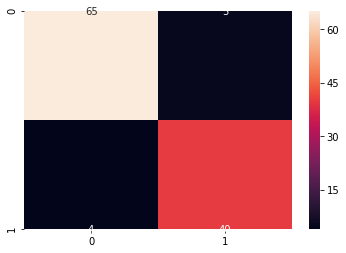

In [34]:
sns.heatmap(pd.DataFrame(cnf_metrics), annot=True, fmt='0.2g')

In [35]:
accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 score: ", metrics.f1_score(y_test, y_pred))

Accuracy:  0.9210526315789473
Recall:  0.9090909090909091
Precision:  0.8888888888888888
F1 score:  0.8988764044943819


In [36]:
f1 = 2*((recall*precision)/(recall+precision))
f1

0.8988764044943819

In [37]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)


In [38]:
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        70
           1       0.89      0.91      0.90        44

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [39]:
from sklearn.metrics import log_loss

log_loss(y_test, y_pred)

2.7267805749240983

#### Via For-Loop identify AUC, Recall, Precision for thresholds ranging 0.1 to 0.9

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss

model = LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [42]:
calculations = {}
for threshold in thresholds:
    calculation = {}
    pred_prob = model.predict_proba(X_test)
    y_pred = (pred_prob[:,1] >= threshold) * 1
    auc = metrics.roc_auc_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = 2 * ((recall * precision)/(recall + precision))
    loss = log_loss(y_test, y_pred)
    calculation['AUC'] = auc
    calculation['Accuracy'] = accuracy
    calculation['Recall'] = recall
    calculation['Precision'] = precision
    calculation['F1 Score'] = f1_score
    calculation['Log Loss'] = loss
    calculations[threshold] = calculation

In [43]:
calDF = pd.DataFrame(calculations)
calDF.T

,AUC,Accuracy,Recall,Precision,F1 Score,Log Loss
0.0,0.500000,0.385965,1.000000,0.385965,0.556962,21.208512
0.1,0.924351,0.912281,0.977273,0.826923,0.895833,3.029780
0.2,0.918831,0.921053,0.909091,0.888889,0.898876,2.726781
0.3,0.918831,0.921053,0.909091,0.888889,0.898876,2.726781
0.4,0.918831,0.921053,0.909091,0.888889,0.898876,2.726781
0.5,0.907468,0.912281,0.886364,0.886364,0.886364,3.029752
0.6,0.896104,0.903509,0.863636,0.883721,0.873563,3.332724
0.7,0.910390,0.921053,0.863636,0.926829,0.894118,2.726767
0.8,0.894805,0.912281,0.818182,0.947368,0.878049,3.029731
0.9,0.901948,0.921053,0.818182,0.972973,0.888889,2.726753


#### Via For-Loop identify AUC, Recall, Precision for thresholds ranging 0.1 to 0.9 after SMOTE

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.over_sampling import SMOTE

model = LogisticRegression(solver='liblinear')
sm = SMOTE() 

X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
model.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
import numpy as np
unique_elements, counts_elements = np.unique(y_train_res, return_counts=True)
print(unique_elements, counts_elements)

[0 1] [287 287]


In [46]:
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [47]:
calculations = {}
for threshold in thresholds:
    calculation = {}
    pred_prob = model.predict_proba(X_test)
    y_pred = (pred_prob[:,1] >= threshold) * 1
    auc = metrics.roc_auc_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    f1_score = 2 * ((recall * precision)/(recall + precision))
    loss = log_loss(y_test, y_pred)
    calculation['AUC'] = auc
    calculation['Accuracy'] = accuracy
    calculation['Recall'] = recall
    calculation['Precision'] = precision
    calculation['F1 Score'] = f1_score
    calculation['Log Loss'] = loss
    calculations[threshold] = calculation
    print(calculation)
    

{'AUC': 0.5, 'Accuracy': 0.38596491228070173, 'Recall': 1.0, 'Precision': 0.38596491228070173, 'F1 Score': 0.5569620253164557, 'Log Loss': 21.208511574244397}
{'AUC': 0.9172077922077922, 'Accuracy': 0.9035087719298246, 'Recall': 0.9772727272727273, 'Precision': 0.8113207547169812, 'F1 Score': 0.88659793814433, 'Log Loss': 3.332759090511575}
{'AUC': 0.9188311688311689, 'Accuracy': 0.9210526315789473, 'Recall': 0.9090909090909091, 'Precision': 0.8888888888888888, 'F1 Score': 0.8988764044943819, 'Log Loss': 2.7267805749240983}
{'AUC': 0.9188311688311689, 'Accuracy': 0.9210526315789473, 'Recall': 0.9090909090909091, 'Precision': 0.8888888888888888, 'F1 Score': 0.8988764044943819, 'Log Loss': 2.7267805749240983}
{'AUC': 0.9188311688311689, 'Accuracy': 0.9210526315789473, 'Recall': 0.9090909090909091, 'Precision': 0.8888888888888888, 'F1 Score': 0.8988764044943819, 'Log Loss': 2.7267805749240983}
{'AUC': 0.9188311688311689, 'Accuracy': 0.9210526315789473, 'Recall': 0.9090909090909091, 'Preci

In [48]:
calDF = pd.DataFrame(calculations)
#calDF.T
calDF.T

,AUC,Accuracy,Recall,Precision,F1 Score,Log Loss
0.0,0.500000,0.385965,1.000000,0.385965,0.556962,21.208512
0.1,0.917208,0.903509,0.977273,0.811321,0.886598,3.332759
0.2,0.918831,0.921053,0.909091,0.888889,0.898876,2.726781
0.3,0.918831,0.921053,0.909091,0.888889,0.898876,2.726781
0.4,0.918831,0.921053,0.909091,0.888889,0.898876,2.726781
0.5,0.918831,0.921053,0.909091,0.888889,0.898876,2.726781
0.6,0.896104,0.903509,0.863636,0.883721,0.873563,3.332724
0.7,0.910390,0.921053,0.863636,0.926829,0.894118,2.726767
0.8,0.887662,0.903509,0.818182,0.923077,0.867470,3.332710
0.9,0.901948,0.921053,0.818182,0.972973,0.888889,2.726753
